# Jupyter for Bioinformatics & Data Science

# Installation

Run the following command in a terminal window to install anaconda and the required packages:

```bash
$ wget https://repo.continuum.io/archive/Anaconda2-4.4.0-Linux-x86_64.sh
$ bash Anaconda2-4.4.0-Linux-x86_64.sh
$ source ~/.bashrc
$ conda install -c anaconda biopython
$ conda install -c rdkit rdkit
$ conda install scikit-learn
```

## Bioinformatics?


[What is Bioinformatics?](http://learn.org/articles/What_is_Bioinformatics.html) "It is the application of information technology to the study of living things".

[Why to use Bioinformatics?](https://bioinformatics.ucsf.edu/about/program) It is very important for quantitative analysis of massive amounts of biological data that cannot be interpreted or exploited by the human brain alone.

![ex1_img1](https://static1.squarespace.com/static/52a751fce4b033709a8acae1/t/56370e2be4b09838a5f23364/1446448683862/?format=300w)

# Examples

**Question1:** Search and downloand all cyanobacterial genomes from the genus `Nostoc` from [NCBI database](https://www.ncbi.nlm.nih.gov/Traces/wgs/)?

**My answer1:**
- Search for `cyanobacteria` [at this link here](https://www.ncbi.nlm.nih.gov/Traces/wgs/?page=1&view=all&search=nostoc)
- Download file using the `download button`
- Upload the file into your server and Jupyter interface and then run the cell below (notice that we're subsetting 30 genomes for the purpose of time)

In [1]:
import os
import subprocess
import time
from itertools import islice
import pandas as pd

start_time = time.time()

if not os.path.exists("./ods/"):
    !mkdir ./ods
    raise ValueError("File ./ods/wgs_selector.txt not found, please upload the file inside the folder ./ods")

if os.path.exists("./ods/wgs_selector.txt"):
    commands = []
    count = 0
    !cat ./ods/wgs_selector.txt | tr "\t" "~" | cut -d"~" -f1 | sed 1d > ./ods/ids.txt
    with open("./ods/ids.txt") as ids:
        head = list(islice(ids, 30))
        for code in head:
            prefix = code.strip("\n")
            line = "wget 'ftp://ftp.ncbi.nlm.nih.gov/sra/wgs_aux/%s/%s/%s/%s.1.fsa_nt.gz' -O - | gunzip > ./ods/%s.fasta"%(prefix[0:2],prefix[2:4],prefix,prefix,prefix)
            commands.append(line)
    table1_handle = open('./ods/download_cyanobacteria.sh', "w")
    cmd_df = pd.DataFrame(commands)
    cmd_df.to_csv(table1_handle, sep='\t', index=False, header=False)
    table1_handle.close()
    !rm ./ods/ids.txt
else:
    raise ValueError("File ./ods/wgs_selector.txt not found")

!sh ./ods/download_cyanobacteria.sh
    
print('\n' + "--- %s seconds ---" %(time.time()-start_time))

--2017-10-10 09:57:29--  ftp://ftp.ncbi.nlm.nih.gov/sra/wgs_aux/AN/FJ/ANFJ01/ANFJ01.1.fsa_nt.gz
           => ‘-’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 2607:f220:41e:250::12
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /sra/wgs_aux/AN/FJ/ANFJ01 ... done.
==> SIZE ANFJ01.1.fsa_nt.gz ... 1768037
==> PASV ... done.    ==> RETR ANFJ01.1.fsa_nt.gz ... done.
Length: 1768037 (1.7M) (unauthoritative)

ANFJ01.1.fsa_nt.gz  100%[===================>]   1.69M   934KB/s    in 1.8s    

2017-10-10 09:57:32 (934 KB/s) - written to stdout [1768037]

--2017-10-10 09:57:32--  ftp://ftp.ncbi.nlm.nih.gov/sra/wgs_aux/AN/FQ/ANFQ01/ANFQ01.1.fsa_nt.gz
           => ‘-’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 2607:f220:41e:250::12
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|13

Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /sra/wgs_aux/AU/SW/AUSW01 ... done.
==> SIZE AUSW01.1.fsa_nt.gz ... 1000197
==> PASV ... done.    ==> RETR AUSW01.1.fsa_nt.gz ... done.
Length: 1000197 (977K) (unauthoritative)

AUSW01.1.fsa_nt.gz  100%[===================>] 976.75K  2.03MB/s    in 0.5s    

2017-10-10 09:58:02 (2.03 MB/s) - written to stdout [1000197]

--2017-10-10 09:58:02--  ftp://ftp.ncbi.nlm.nih.gov/sra/wgs_aux/AU/ZM/AUZM01/AUZM01.1.fsa_nt.gz
           => ‘-’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 2607:f220:41e:250::13
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /sra/wgs_aux/AU/ZM/AUZM01 ... done.
==> SIZE AUZM01.1.fsa_nt.gz 

**References**

i) [NCBI: Downloading SRA data using command line utilities](https://www.ncbi.nlm.nih.gov/books/NBK158899/)

**Question2:** How to rename the first line for hundreads of files?

**My answer2:**
- Use biopython to read fasta files, renamed their headers and save the renamed output

In [2]:
from Bio import SeqIO
import os
import glob

start_time = time.time()

def rename_gbk(filename, outpath):
    strain = os.path.splitext(os.path.basename(filename))[0]
    new_file = []
    input_handle = open("%s"%filename, "rU")
    node_count = 1
    for record in SeqIO.parse(input_handle, "fasta"):
        new_id = "%s_NODE_%s"%(strain,node_count)
        record.id = str(new_id)
        record.description = ""
        new_file.append(record)
        node_count += 1
    output_handle = open("%s/%s.ren.fasta"%(outpath,strain), "w")
    SeqIO.write(new_file, output_handle, "fasta")
    output_handle.close()
    input_handle.close()

count = 0
input_list = glob.glob("/home/sm2/Desktop/part1/ods/*.fasta")
for item in input_list:
    rename_gbk(item, '/home/sm2/Desktop/part1/ods/')
    count += 1

t = time.time()-start_time
print("%s fasta files were renamed in %s seconds"%(count,t))

30 fasta files were renamed in 4.96064901352 seconds


**References**

i) [Biopython Tutorial and Cookbook](http://biopython.org/DIST/docs/tutorial/Tutorial.html)

ii) [Python for Bioinformatics: Table of Contents](https://github.com/tiagoantao/bioinf-python/blob/f2e05df2d7baa54f9fbbc246b2526ee57d8b451c/notebooks/Welcome.ipynb)

iii) [Python for Bioinformatics: Accessing Databases](https://github.com/tiagoantao/bioinf-python/blob/f2e05df2d7baa54f9fbbc246b2526ee57d8b451c/notebooks/01_NGS/Accessing_Databases.ipynb)

**Question3**: I discovered a new structure and I want to search analogs in the [ZINC database](http://zinc.docking.org/). I want to find all secondary amines that are halogenated (excluding the ones containing only fluorine as the halogen)

Run the following command in a terminal window
```bash
conda install -c rdkit rdkit
```

**Downloading and Parsing ZINC Database**

In [3]:
%%bash

cd ./ods/
wget http://zinc.docking.org/db/special/99/99_p0.smi.gz

--2017-10-10 09:58:39--  http://zinc.docking.org/db/special/99/99_p0.smi.gz
Resolving zinc.docking.org (zinc.docking.org)... 169.230.26.43
Connecting to zinc.docking.org (zinc.docking.org)|169.230.26.43|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4894884 (4.7M) [application/x-gzip]
Saving to: ‘99_p0.smi.gz.1’

     0K .......... .......... .......... .......... ..........  1% 1.27M 4s
    50K .......... .......... .......... .......... ..........  2% 1.89M 3s
   100K .......... .......... .......... .......... ..........  3% 1.90M 3s
   150K .......... .......... .......... .......... ..........  4% 3.76M 2s
   200K .......... .......... .......... .......... ..........  5% 3.78M 2s
   250K .......... .......... .......... .......... ..........  6% 3.73M 2s
   300K .......... .......... .......... .......... ..........  7% 3.81M 2s
   350K .......... .......... .......... .......... ..........  8% 3.74M 2s
   400K .......... .......... .......... ..........

In [4]:
import gzip,random
inlines = gzip.open('./ods/99_p0.smi.gz').readlines()
random.seed(42)
random.shuffle(inlines)
indata = '\n'.join(inlines[:10000])

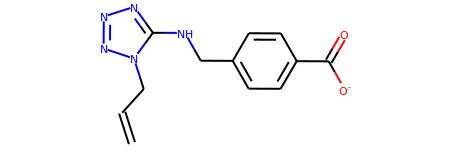

In [5]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
suppl = Chem.SmilesMolSupplier()
suppl.SetData(indata)
ms = [x for x in suppl if x is not None]
ms[1]

**Identifying Functional Groups on our Dataset**

In [6]:
from collections import namedtuple
from rdkit.Chem import FunctionalGroups

fgs = FunctionalGroups.BuildFuncGroupHierarchy()
nt = namedtuple('pattern','smarts mol')
def flattenFgs(fgs,res):
    if not fgs:
        return
    for x in fgs:
        res[x.label]=nt(x.smarts,x.pattern)
        flattenFgs(x.children,res)
allFgDefs={}
flattenFgs(fgs,allFgDefs)

allFgNames=sorted(allFgDefs.keys())
allFgNames

['AcidChloride',
 'AcidChloride.Aliphatic',
 'AcidChloride.Aromatic',
 'Alcohol',
 'Alcohol.Aliphatic',
 'Alcohol.Aromatic',
 'Aldehyde',
 'Aldehyde.Aliphatic',
 'Aldehyde.Aromatic',
 'Amine',
 'Amine.Aliphatic',
 'Amine.Aromatic',
 'Amine.Cyclic',
 'Amine.Primary',
 'Amine.Primary.Aliphatic',
 'Amine.Primary.Aromatic',
 'Amine.Secondary',
 'Amine.Secondary.Aliphatic',
 'Amine.Secondary.Aromatic',
 'Amine.Tertiary',
 'Amine.Tertiary.Aliphatic',
 'Amine.Tertiary.Aromatic',
 'Azide',
 'Azide.Aliphatic',
 'Azide.Aromatic',
 'BoronicAcid',
 'BoronicAcid.Aliphatic',
 'BoronicAcid.Aromatic',
 'CarboxylicAcid',
 'CarboxylicAcid.Aliphatic',
 'CarboxylicAcid.AlphaAmino',
 'CarboxylicAcid.Aromatic',
 'Halogen',
 'Halogen.Aliphatic',
 'Halogen.Aromatic',
 'Halogen.Bromine',
 'Halogen.Bromine.Aliphatic',
 'Halogen.Bromine.Aromatic',
 'Halogen.Bromine.BromoKetone',
 'Halogen.NotFluorine',
 'Halogen.NotFluorine.Aliphatic',
 'Halogen.NotFluorine.Aromatic',
 'Isocyanate',
 'Isocyanate.Aliphatic',
 'Is

In [7]:
allFgs={}
for fgn in allFgNames:
    patt = allFgDefs[fgn]
    allFgs[fgn]=[m for m in ms if m.HasSubstructMatch(patt.mol)]
    print '%s: Found %d '%(fgn,len(allFgs[fgn]))

AcidChloride: Found 97 
AcidChloride.Aliphatic: Found 58 
AcidChloride.Aromatic: Found 39 
Alcohol: Found 1308 
Alcohol.Aliphatic: Found 1001 
Alcohol.Aromatic: Found 340 
Aldehyde: Found 255 
Aldehyde.Aliphatic: Found 33 
Aldehyde.Aromatic: Found 222 
Amine: Found 4705 
Amine.Aliphatic: Found 2974 
Amine.Aromatic: Found 2113 
Amine.Cyclic: Found 1839 
Amine.Primary: Found 1019 
Amine.Primary.Aliphatic: Found 165 
Amine.Primary.Aromatic: Found 857 
Amine.Secondary: Found 763 
Amine.Secondary.Aliphatic: Found 169 
Amine.Secondary.Aromatic: Found 594 
Amine.Tertiary: Found 987 
Amine.Tertiary.Aliphatic: Found 260 
Amine.Tertiary.Aromatic: Found 263 
Azide: Found 4 
Azide.Aliphatic: Found 3 
Azide.Aromatic: Found 1 
BoronicAcid: Found 0 
BoronicAcid.Aliphatic: Found 0 
BoronicAcid.Aromatic: Found 0 
CarboxylicAcid: Found 2019 
CarboxylicAcid.Aliphatic: Found 1309 
CarboxylicAcid.AlphaAmino: Found 194 
CarboxylicAcid.Aromatic: Found 723 
Halogen: Found 3262 
Halogen.Aliphatic: Found 567 
H

**Selecting and Drawing Brominated, Chlorinated and Iodated Secondary Amides**

In [8]:
halogens = allFgs['Halogen.NotFluorine.Aromatic']
amines = allFgs['Amine.Secondary']

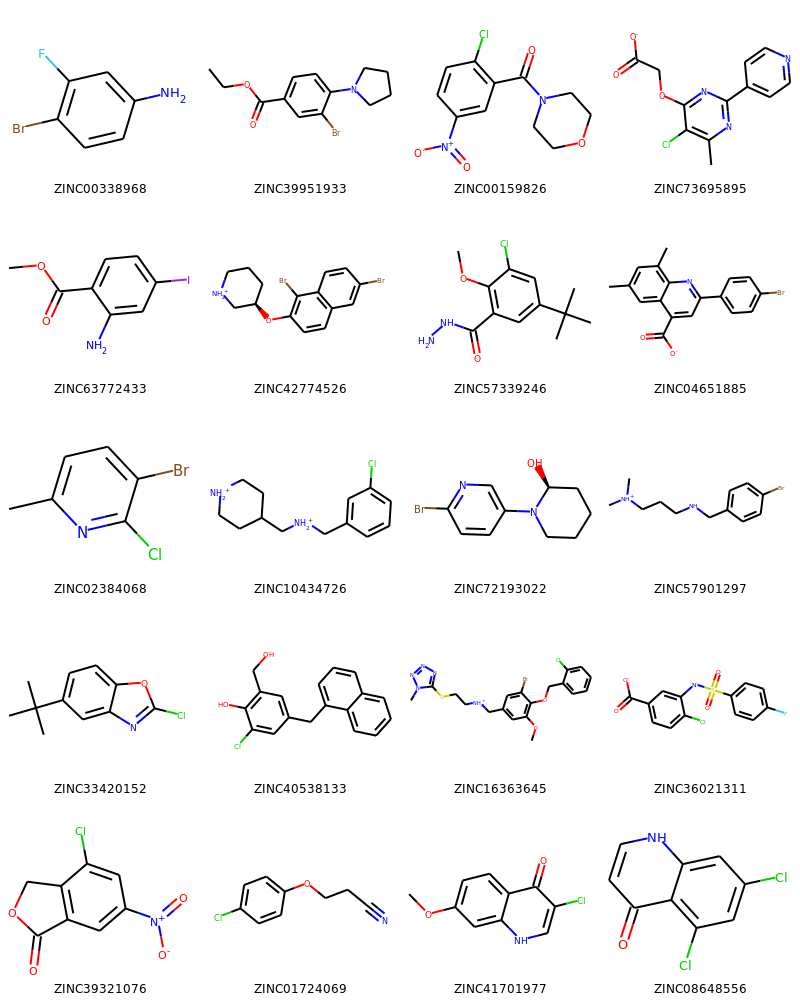

In [9]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(halogens[:20],molsPerRow=4,legends=[x.GetProp('_Name') for x in halogens])

**References**

1) http://nbviewer.jupyter.org/gist/greglandrum/4316430

# Python for Data Science

Here we're going to summarize a tutorial on [Reproducible Data Analysis Workflow in Jupyter](https://github.com/jakevdp/JupyterWorkflow)  using bike traffic data in major bridge from Seattle. I strongly recommend to check out the [full videotutorial](http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/). 

Author: Dr Jake VanderPlas, University of Washington (created at Fri 03 March 2017)

**Getting Data**

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

sns.set()

In [11]:
from jupyterworkflow.data import get_fremont_data

data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


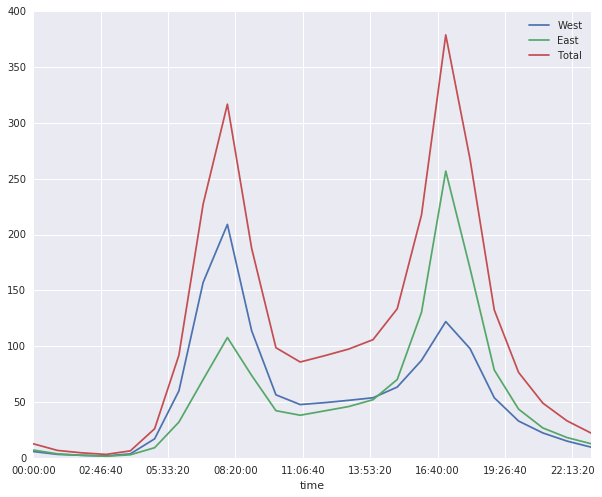

In [12]:
data.groupby(data.index.time).mean().plot(figsize=(10, 8));

**Replotting Data for Alternative Visualization**

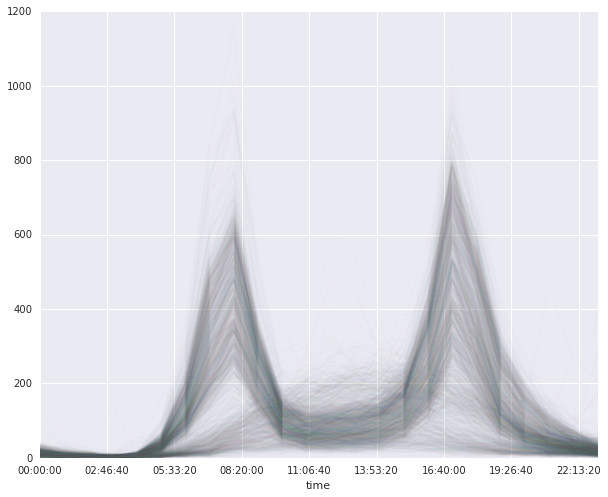

In [13]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01,figsize=(10, 8));

**Principal Component Analysis**

In [14]:
X = pivoted.fillna(0).T.values
X.shape

(1824, 24)

In [15]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(1824, 2)

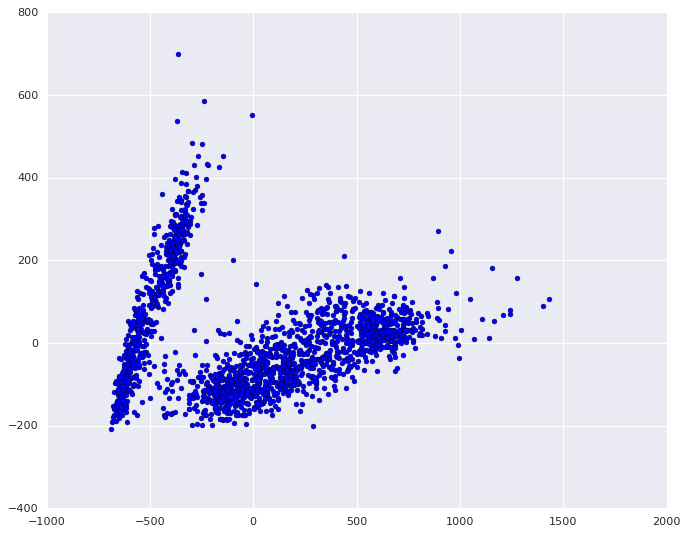

In [16]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X2[:, 0], X2[:, 1]);

**Unsupervised Clustering**

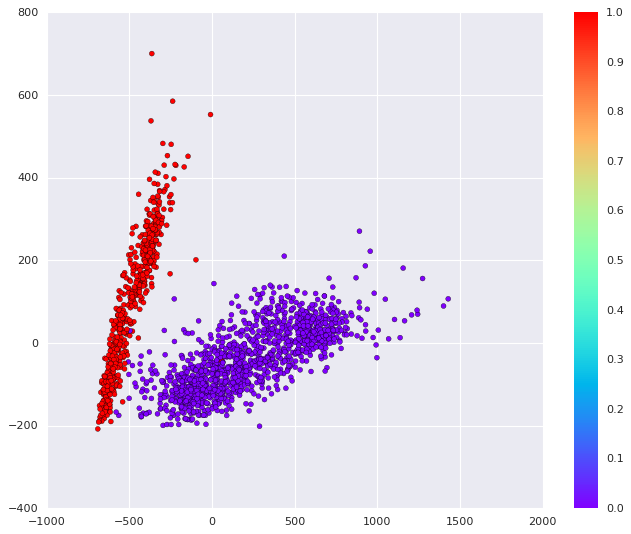

In [17]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

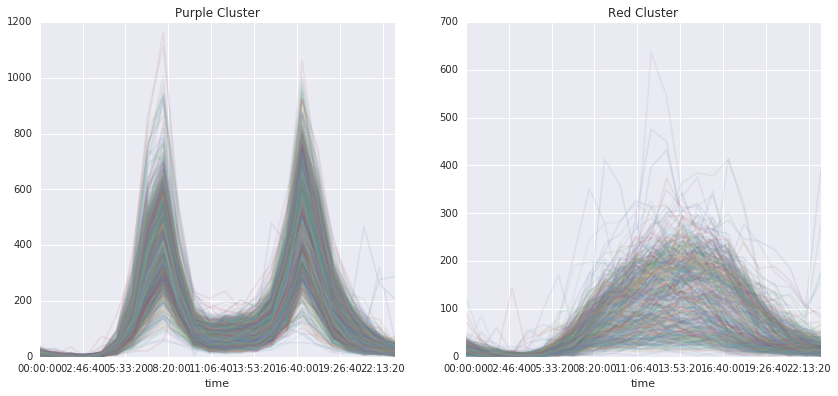

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

**Comparing with Day of Week**

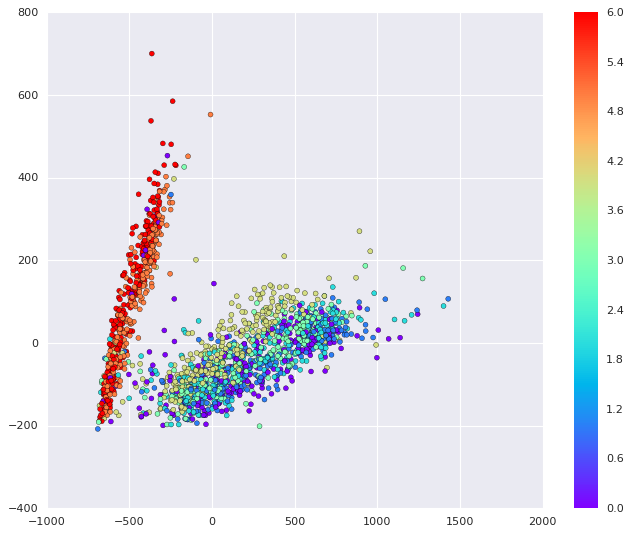

In [19]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

**Taking a Look into Outliers**

In [20]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04'],
              dtype='datetime64[ns]', freq=None)

**References**

i) [Pythonic Perambulations:Reproducible Data Analysis in Jupyter](http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/)

ii) [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/058289a6a8a544d2bc144ba0226d6ef27986e4e0/notebooks/Index.ipynb)